In [37]:
from sklearn import datasets
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import seaborn as sns


In [38]:
X = pd.read_csv("/content/train.csv")
Y = pd.read_csv("/content/test.csv")
print("Examples = ",X.shape ," Labels = ", Y.shape)

print("-----------------------------------------------------------------------")
# dataset to DataFrame

print("Info : \n",X.info())

print("-----------------------------------------------------------------------")
print("describe : \n",X.describe())

print("-----------------------------------------------------------------------")
# Display first 10 records
print(X.head(10))
print("---------------------------Test--------------------------------------------")

print(Y.head(10))



Examples =  (31312, 8)  Labels =  (15423, 7)
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31312 entries, 0 to 31311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID_Client    31312 non-null  float64
 1   Date         31312 non-null  object 
 2   gender       29819 non-null  object 
 3   YearOfBirth  21096 non-null  float64
 4   region       24667 non-null  float64
 5   Campagne     30420 non-null  float64
 6   Clic         31312 non-null  int64  
 7   Buy          31312 non-null  object 
dtypes: float64(4), int64(1), object(3)
memory usage: 1.9+ MB
Info : 
 None
-----------------------------------------------------------------------
describe : 
           ID_Client   YearOfBirth        region      Campagne          Clic
count  31312.000000  21096.000000  24667.000000  30420.000000  31312.000000
mean    2495.840093   1985.428612      3.9

In [39]:
print(" Labels = ", Y.shape)

 Labels =  (15423, 7)


In [40]:
print(X["Buy"])


0         No
1         No
2         No
3         No
4         No
        ... 
31307     No
31308     No
31309     No
31310    Yes
31311     No
Name: Buy, Length: 31312, dtype: object


In [41]:
X["Buy"] =X["Buy"].map({"Yes":1,"No": 0 })


In [42]:
y_train = X['Buy']
print(y_train)

0        0
1        0
2        0
3        0
4        0
        ..
31307    0
31308    0
31309    0
31310    1
31311    0
Name: Buy, Length: 31312, dtype: int64


In [43]:
print("SUM : \n",X.isnull().sum())


SUM : 
 ID_Client          0
Date               0
gender          1493
YearOfBirth    10216
region          6645
Campagne         892
Clic               0
Buy                0
dtype: int64


In [44]:
Y.head()

,ID_Client,Date,gender,YearOfBirth,region,Campagne,Clic
0,3371.0,2023-01-30,Male,NaN,2.0,9.0,1
1,342.0,2022-12-19,NaN,1995.0,5.0,4.0,1
2,2379.0,2023-01-04,Male,1980.0,7.0,5.0,1
3,2112.0,2023-02-10,Female,1996.0,NaN,6.0,0
4,378.0,2022-12-04,Female,NaN,1.0,3.0,0


In [45]:
most_frequent_gender = X["gender"].mode()[0]
X["gender"] = X["gender"].fillna(most_frequent_gender)
most_frequent_YearOfBirth = X["YearOfBirth"].mode()[0]
X["YearOfBirth"]=X["YearOfBirth"].fillna(most_frequent_YearOfBirth)
X["region"] = X["region"].fillna(X["region"].mean())
X["Campagne"] = X["Campagne"].fillna(X["Campagne"].mean())



In [46]:
print("SUM : \n",X.isnull().sum())


SUM : 
 ID_Client      0
Date           0
gender         0
YearOfBirth    0
region         0
Campagne       0
Clic           0
Buy            0
dtype: int64


In [47]:
most_frequent_gender = Y["gender"].mode()[0]
Y["gender"] = Y["gender"].fillna(most_frequent_gender)
most_frequent_YearOfBirth = Y["YearOfBirth"].mode()[0]
Y["YearOfBirth"]=Y["YearOfBirth"].fillna(most_frequent_YearOfBirth)
Y["region"] = Y["region"].fillna(Y["region"].mean())
Y["Campagne"] = Y["Campagne"].fillna(Y["Campagne"].mean())

In [48]:
print("SUM : \n",Y.isnull().sum())

SUM : 
 ID_Client      0
Date           0
gender         0
YearOfBirth    0
region         0
Campagne       0
Clic           0
dtype: int64


In [49]:
X.head()

,ID_Client,Date,gender,YearOfBirth,region,Campagne,Clic,Buy
0,2344.0,2023-01-19,Female,1979.0,4.0,2.0,0,0
1,260.0,2023-01-30,Male,1995.0,6.0,1.0,1,0
2,1033.0,2022-12-31,Female,1982.0,5.0,5.0,1,0
3,3489.0,2023-01-24,Male,1979.0,5.0,10.0,1,0
4,4302.0,2023-02-07,Female,1982.0,5.0,10.0,0,0


In [50]:
X=X.drop('Buy',axis=1)

In [51]:
X.head()

,ID_Client,Date,gender,YearOfBirth,region,Campagne,Clic
0,2344.0,2023-01-19,Female,1979.0,4.0,2.0,0
1,260.0,2023-01-30,Male,1995.0,6.0,1.0,1
2,1033.0,2022-12-31,Female,1982.0,5.0,5.0,1
3,3489.0,2023-01-24,Male,1979.0,5.0,10.0,1
4,4302.0,2023-02-07,Female,1982.0,5.0,10.0,0


In [52]:

# Verify the updated values

X.head()

,ID_Client,Date,gender,YearOfBirth,region,Campagne,Clic
0,2344.0,2023-01-19,Female,1979.0,4.0,2.0,0
1,260.0,2023-01-30,Male,1995.0,6.0,1.0,1
2,1033.0,2022-12-31,Female,1982.0,5.0,5.0,1
3,3489.0,2023-01-24,Male,1979.0,5.0,10.0,1
4,4302.0,2023-02-07,Female,1982.0,5.0,10.0,0


In [53]:
# Y_trainy = X['Buy']
# print(Y_trainy)

In [54]:
X["gender"] = X["gender"].map({"Male":0,"Female":1})
print("sex : \n",X["gender"].head(20))
Y["gender"] = Y["gender"].map({"Male":0,"Female":1})
print("sex : \n",Y["gender"].head(20))


sex : 
 0     1
1     0
2     1
3     0
4     1
5     0
6     1
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
Name: gender, dtype: int64
sex : 
 0     0
1     0
2     0
3     1
4     1
5     1
6     1
7     0
8     1
9     0
10    0
11    1
12    0
13    1
14    0
15    0
16    1
17    0
18    0
19    0
Name: gender, dtype: int64


In [55]:
X["Date"] = pd.to_datetime(X["Date"])
X["year"] = X["Date"].dt.year
X["month"] = X["Date"].dt.month
X["day"] = X["Date"].dt.day
X= X.drop(["Date"], axis=1)
X.head(10)

,ID_Client,gender,YearOfBirth,region,Campagne,Clic,year,month,day
0,2344.0,1,1979.0,4.0,2.000000,0,2023,1,19
1,260.0,0,1995.0,6.0,1.000000,1,2023,1,30
2,1033.0,1,1982.0,5.0,5.000000,1,2022,12,31
3,3489.0,0,1979.0,5.0,10.000000,1,2023,1,24
4,4302.0,1,1982.0,5.0,10.000000,0,2023,2,7
5,4162.0,0,1983.0,6.0,7.000000,1,2023,2,18
6,1569.0,1,1979.0,4.0,10.000000,0,2022,12,27
7,3215.0,0,1979.0,4.0,5.505556,0,2022,12,19
8,2329.0,1,1977.0,5.0,4.000000,0,2023,2,26
9,4073.0,1,1988.0,1.0,6.000000,1,2023,1,13


In [56]:
Y["Date"] = pd.to_datetime(Y["Date"])
Y["year"] = Y["Date"].dt.year
Y["month"] = Y["Date"].dt.month
Y["day"] = Y["Date"].dt.day
Y= Y.drop(["Date"], axis=1)
Y.head(10)

,ID_Client,gender,YearOfBirth,region,Campagne,Clic,year,month,day
0,3371.0,0,1996.0,2.000000,9.0,1,2023,1,30
1,342.0,0,1995.0,5.000000,4.0,1,2022,12,19
2,2379.0,0,1980.0,7.000000,5.0,1,2023,1,4
3,2112.0,1,1996.0,3.944683,6.0,0,2023,2,10
4,378.0,1,1996.0,1.000000,3.0,0,2022,12,4
5,396.0,1,1974.0,4.000000,4.0,1,2023,2,18
6,1684.0,1,1974.0,3.944683,6.0,0,2023,2,18
7,4459.0,0,1996.0,5.000000,5.0,1,2022,12,25
8,1960.0,1,1996.0,3.944683,7.0,1,2022,12,17
9,682.0,0,1996.0,6.000000,6.0,0,2023,1,29


In [57]:
# from sklearn import preprocessing

# scaler = preprocessing.StandardScaler()
# X_train_scaler = scaler.fit_transform(X)
# print(X_train_scaler)


In [58]:
# from sklearn import preprocessing
# scaler = preprocessing.StandardScaler()
# Y_test_scaler = scaler.fit_transform(Y)
# print(Y_test_scaler)

In [59]:
duplicate_rows = X[X.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

number of duplicate rows :  (0, 9)


In [60]:
duplicate_rows = Y[Y.duplicated()]
print("number of duplicate rows : ",duplicate_rows.shape)

number of duplicate rows :  (0, 9)


<function matplotlib.pyplot.show(close=None, block=None)>

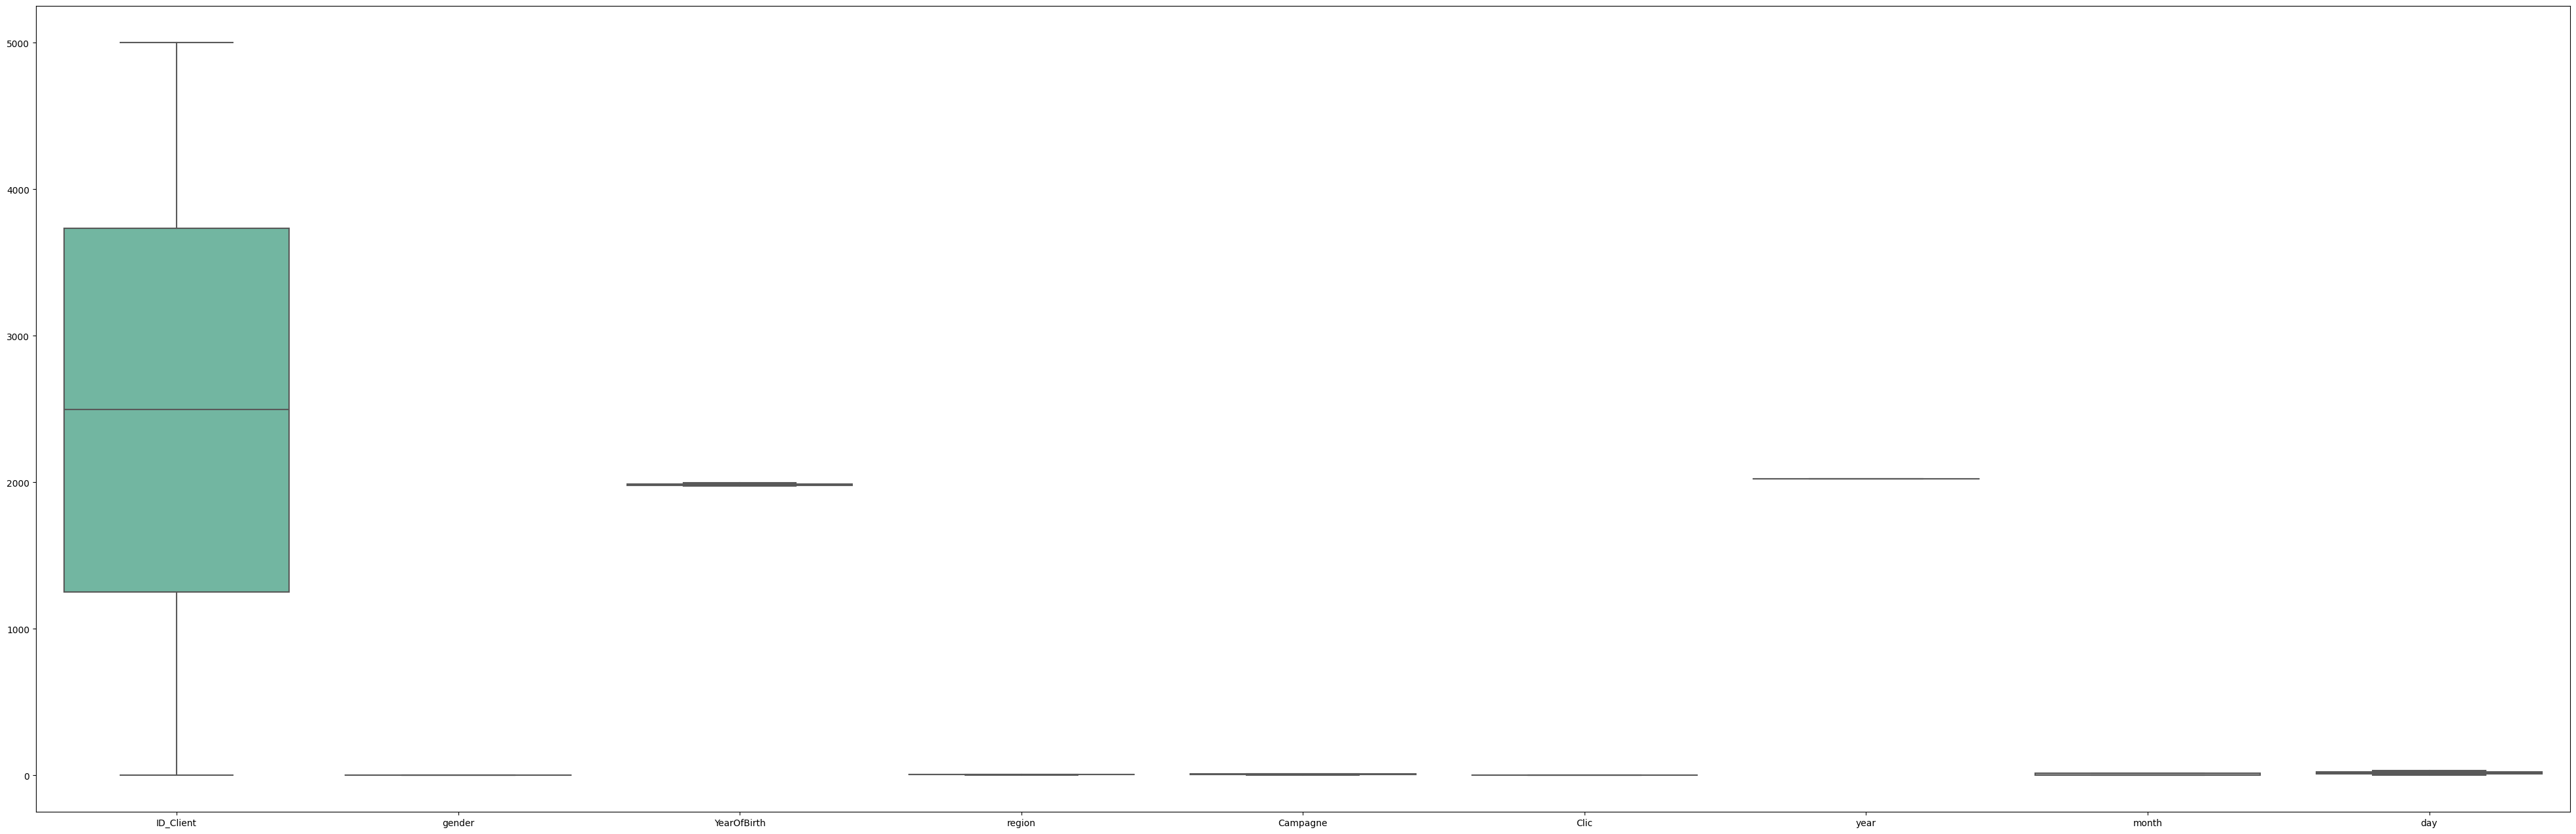

In [61]:
fig, ax = plt.subplots(figsize=(50,16))
sns.boxplot(data=X, orient="v", palette="Set2")
plt.show

In [62]:
 from sklearn.model_selection import train_test_split


# # Split data into train and test subsets
# X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_scaler, Y_test_scaler, test_size= 0.20)
# # val set
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, Y_trainy
#                                                       , test_size= 0.20)
# print("X_train : ",X_train.shape," X_valid : ",X_valid.shape," X_test : ",X_test.shape)

# # print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
# # print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X,y_train , test_size=0.2, random_state=100)
print("X_train = ",X_train.shape ," y_train = ", y_train.shape)
from keras.layers import Dense
print("X_test  = ",X_test.shape ," y_test = ", y_test.shape)

X_train =  (25049, 9)  y_train =  (25049,)
X_test  =  (6263, 9)  y_test =  (6263,)


In [64]:
# model = keras.models.Sequential()
# model.add(keras.layers.Dense(9, input_dim=9, activation='relu'))
# model.add(keras.layers.Dense(32, activation="relu"))
# model.add(keras.layers.Dense(64, activation="relu"))
# model.add(keras.layers.Dense(128, activation="relu"))
# model.add(keras.layers.Dense(64, activation="relu"))
# model.add(keras.layers.Dense(1, activation="sigmoid"))
# print(model.summary())


In [65]:
# # Compiling the model
# #optimizer = keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.1, beta_2=0.9, clipvalue=1.0)
# optimizer = keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, clipvalue=1.0)
# #optimizer=keras.optimizers.RMSprop(learning_rate=0.001,rho=0.9,momentum=0.0,epsilon=1e-07,
# #centered=False,weight_decay=None,clipnorm=None,clipvalue=None,global_clipnorm=None,use_ema=False,ema_momentum=0.99,ema_overwrite_frequency=100,
# #    jit_compile=True,name="RMSprop",)
# model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])


# # Learning rate scheduling
# lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.0001, patience=2,
#                                       monitor="val_accuracy", min_lr=0.00001)

# # Interrupts training when it measures no progress on the validation set
# early_stopping_cb = keras.callbacks.EarlyStopping(patience=20, monitor = "val_loss",
#                                                   restore_best_weights=True)
# from sklearn.utils import class_weight

# # Class weight
# class_weights = class_weight.compute_class_weight(class_weight="balanced",
#                                                  classes=np.unique(y_train),
#                                                  y=y_train)
# class_weights = dict(enumerate(class_weights))
# EPOCHS = 200
# BS =68
# # Training the model
# history = model.fit(X_train,
#                     y_train
#                     , batch_size = BS,
#                     steps_per_epoch=len(X_train) // BS,
#                     epochs= EPOCHS,
#                     class_weight= class_weights,
#                      validation_data=(X_test, y_test),
#                     callbacks=[lr_scheduler, early_stopping_cb] )

# # Training the model
# #history = model.fit(X_train, Y_trainy, epochs=20, batch_size=64, validation_split=0.2)
# # Training and evaluating the model


In [66]:
Y.head()

,ID_Client,gender,YearOfBirth,region,Campagne,Clic,year,month,day
0,3371.0,0,1996.0,2.000000,9.0,1,2023,1,30
1,342.0,0,1995.0,5.000000,4.0,1,2022,12,19
2,2379.0,0,1980.0,7.000000,5.0,1,2023,1,4
3,2112.0,1,1996.0,3.944683,6.0,0,2023,2,10
4,378.0,1,1996.0,1.000000,3.0,0,2022,12,4


In [67]:
# import numpy as np
# from sklearn.model_selection import train_test_split
#z from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from xgboost import XGBRegressor
# from sklearn.model_selection import KFold


# # Define the base models
# model1 = RandomForestRegressor(random_state=100,max_depth=5,n_estimators=300)
# model2 = XGBRegressor(random_state=100,learning_rate=0.001,n_estimators=300)
# meta_model = LinearRegression()

# #train
# model1.fit(X_train, y_train)
# model2.fit(X_train, y_train)

# pred1=model1.predict(Y)
# pred2=model2.predict(Y)


In [68]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#When LRate =  0.01  MaxD =  4  n estm =  150  Accuracy :  0.7986507524649714
#When LRate =  0.01  MaxD =  4  n estm =  200  Accuracy :  0.7986507524649714


xgb_classifier = xgb.XGBClassifier(learning_rate=0.1,
    max_depth=5,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.01,
    reg_lambda=1.0,
    min_child_weight=1,
    gamma=0.0,
    random_state=42)

xgb_classifier.fit(X_train, y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [69]:
predictions=xgb_classifier.predict(Y)

In [70]:
#predictions=model.predict(Y)
Y['ID_Date'] = Y['ID_Client'].astype(str) +'_'+ Y["year"].astype(str)+'-'+Y["month"].astype(str)+'-'+Y["day"].astype(str)+' '+'00:00:00'
one_dimensional_array = predictions.astype(float).flatten()

data = {'ID':Y['ID_Client'] ,
        'Buy': one_dimensional_array}

# Create DataFrame
df = pd.DataFrame(data)

# Print the output.Z
df


,ID,Buy
0,3371.0,0.0
1,342.0,0.0
2,2379.0,0.0
3,2112.0,0.0
4,378.0,0.0
...,...,...
15418,2090.0,0.0
15419,260.0,0.0
15420,781.0,0.0
15421,3001.0,0.0


In [71]:
filepath='/content/SampleSubmission.csv'
df.to_csv(filepath, index=False)

In [72]:
import pandas as pd

df2 = pd.read_csv('/content/SampleSubmission.csv',index_col=False)
df1 = pd.read_csv('/content/SampleSubmission.csv',index_col=False)

df1["ID"] = df2["ID"]
df1.to_csv('modified_file.csv', index=False)
df1 = pd.read_csv('/content/modified_file.csv',index_col=False)
df1



,ID,Buy
0,3371.0,0.0
1,342.0,0.0
2,2379.0,0.0
3,2112.0,0.0
4,378.0,0.0
...,...,...
15418,2090.0,0.0
15419,260.0,0.0
15420,781.0,0.0
15421,3001.0,0.0


In [75]:
df.to_csv('/content/Submission.csv',index=False)